In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
imb_df = pd.read_csv('../data/imbalance_de.csv', squeeze=True, parse_dates=True, header=None)
imb_df.head()

,0,1,2
0,2013-12-31 23:00:00,707.500,156.36
1,2013-12-31 23:15:00,966.296,81.23
2,2013-12-31 23:30:00,1018.984,104.01
3,2013-12-31 23:45:00,867.940,60.51
4,2014-01-01 00:00:00,1738.004,239.03


In [10]:
imb_df.shape

(257010, 3)

In [11]:
imb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257010 entries, 0 to 257009
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       257010 non-null  object 
 1   1       256807 non-null  float64
 2   2       257010 non-null  float64
dtypes: float64(2), object(1)
memory usage: 5.9+ MB


In [12]:
imb_df.describe()

,1,2
count,256807.000000,257010.000000
mean,80.856740,34.069293
std,494.219467,127.651278
min,-4111.964000,-6503.730000
25%,-205.410000,5.280000
50%,76.797000,38.080000
75%,365.612500,60.940000
max,3866.284000,24455.050000


In [13]:
imb_df['datetime'] = pd.to_datetime(imb_df[0])
imb_df.drop([0], axis=1, inplace=True)
imb_df.head()

,1,2,datetime
0,707.500,156.36,2013-12-31 23:00:00
1,966.296,81.23,2013-12-31 23:15:00
2,1018.984,104.01,2013-12-31 23:30:00
3,867.940,60.51,2013-12-31 23:45:00
4,1738.004,239.03,2014-01-01 00:00:00


In [14]:
imb_df.head()

,1,2,datetime
0,707.500,156.36,2013-12-31 23:00:00
1,966.296,81.23,2013-12-31 23:15:00
2,1018.984,104.01,2013-12-31 23:30:00
3,867.940,60.51,2013-12-31 23:45:00
4,1738.004,239.03,2014-01-01 00:00:00


In [15]:
imb_df = imb_df.set_index('datetime')

In [16]:
imb_df.isnull().sum()

1    203
2      0
dtype: int64

In [17]:
imb_df['weekday'] = imb_df.index.weekday

In [18]:
imb_df['date'] = imb_df.index.date

In [19]:
def fill_missing(data):
    data = data.resample('1H').median()
    data = data.interpolate(method='time', limit_direction='both')
    return data

In [20]:
imb_filled = fill_missing(imb_df)

In [21]:
imb_filled['weekday'] = imb_filled.index.weekday

In [22]:
imb_filled['date'] = imb_filled.index.date

In [23]:
imb_filled.head()

,1,2,weekday,date
datetime,,,,
2013-12-31 23:00:00,917.118,92.620,1,2013-12-31
2014-01-01 00:00:00,1264.266,82.465,2,2014-01-01
2014-01-01 01:00:00,746.810,50.305,2,2014-01-01
2014-01-01 02:00:00,-15.512,-42.080,2,2014-01-01
2014-01-01 03:00:00,-36.904,-28.995,2,2014-01-01


In [24]:
d5 = imb_filled[imb_filled.date == datetime.date(year=2021,month=5,day=22)]

<AxesSubplot:xlabel='datetime', ylabel='1'>

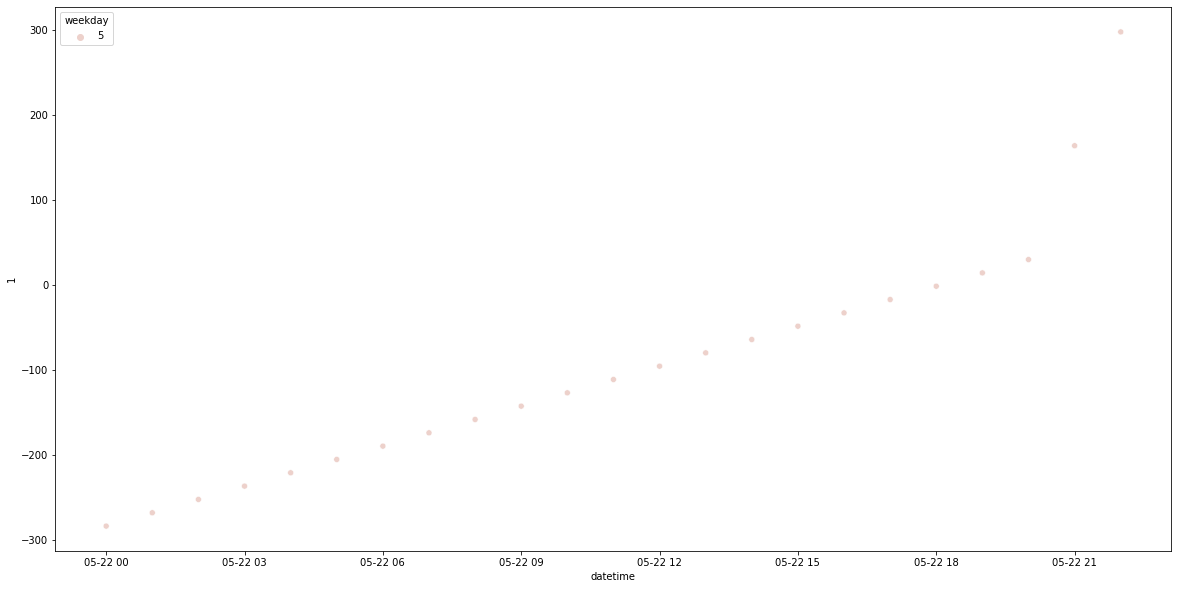

In [25]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=d5, x='datetime', y=1, hue='weekday')

In [26]:
null_data = imb_df[imb_df.isnull().any(axis=1)]

In [27]:
null_data.head(10)

,1,2,weekday,date
datetime,,,,
2015-01-02 05:15:00,NaN,-249.21,4,2015-01-02
2015-01-02 05:30:00,NaN,-287.65,4,2015-01-02
2015-01-02 05:45:00,NaN,-336.42,4,2015-01-02
2015-01-02 07:30:00,NaN,-116.46,4,2015-01-02
2015-01-19 09:30:00,NaN,122.60,0,2015-01-19
2015-01-19 09:45:00,NaN,154.10,0,2015-01-19
2015-10-31 23:00:00,NaN,0.30,5,2015-10-31
2015-10-31 23:15:00,NaN,134.63,5,2015-10-31
2015-10-31 23:30:00,NaN,27.25,5,2015-10-31


In [28]:
d1 = imb_df[imb_df.date == datetime.date(year=2021,month=5,day=22)]

<AxesSubplot:xlabel='datetime', ylabel='1'>

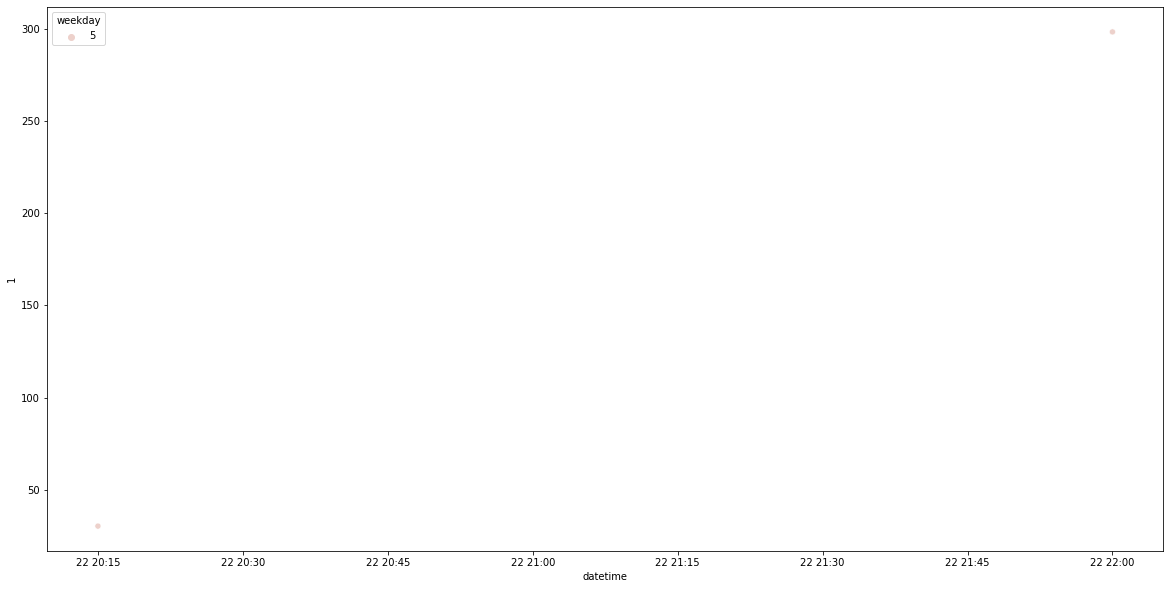

In [29]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=d1, x='datetime', y=1, hue='weekday')

In [30]:
imb_filled.head()

,1,2,weekday,date
datetime,,,,
2013-12-31 23:00:00,917.118,92.620,1,2013-12-31
2014-01-01 00:00:00,1264.266,82.465,2,2014-01-01
2014-01-01 01:00:00,746.810,50.305,2,2014-01-01
2014-01-01 02:00:00,-15.512,-42.080,2,2014-01-01
2014-01-01 03:00:00,-36.904,-28.995,2,2014-01-01


<AxesSubplot:xlabel='datetime'>

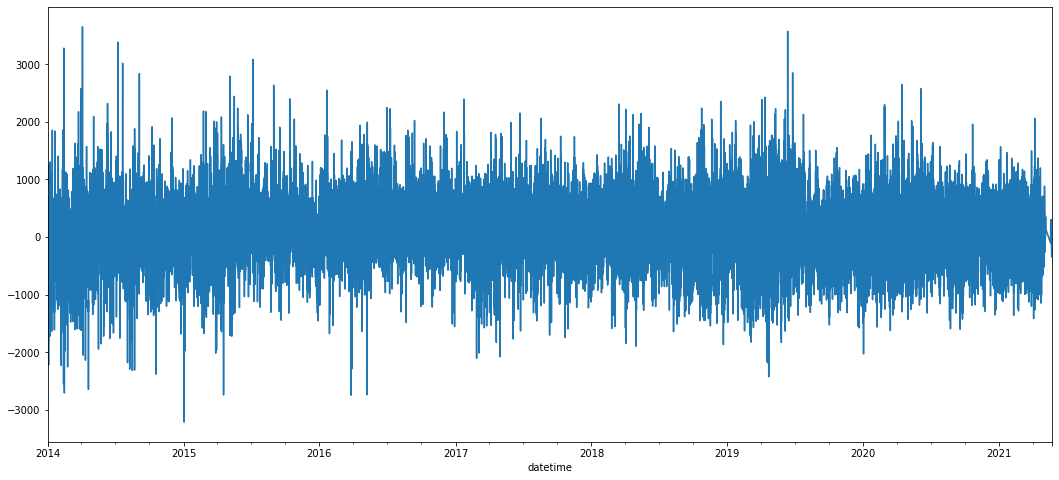

In [31]:
plt.figure(figsize=(18,8))
imb_filled[1].plot()

### Check for stationarity

In [33]:
# ADF test
print("ADF Test:")
adf_test = adfuller(imb_filled[1],autolag='AIC')
print('Null Hypothesis: Not Stationary')
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('----'*10)

# KPSS test
print("KPSS Test:")
kpss_test = kpss(imb_filled[1], regression='c', nlags="legacy", store=False)
print('Null Hypothesis: Stationary')
print('KPSS Statistic: %f' % kpss_test[0])
print('p-value: %f' % kpss_test[1])
print('----'*10)

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -22.561420
p-value: 0.000000
----------------------------------------
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 3.199390
p-value: 0.010000
----------------------------------------


/Users/laurenthartmann/neuefische/capstone_energy/.venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1998: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [34]:
print ('Results of KPSS Test:')
kpsstest = kpss(imb_filled[1], regression='c', nlags='legacy')
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

Results of KPSS Test:
Test Statistic            3.19939
p-value                   0.01000
Lags Used                61.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/Users/laurenthartmann/neuefische/capstone_energy/.venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1998: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [35]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(imb_filled[1], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used',
                                            'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -22.561420
p-value                            0.000000
#Lags Used                        60.000000
Number of Observations Used    64715.000000
Critical Value (1%)               -3.430451
Critical Value (5%)               -2.861585
Critical Value (10%)              -2.566794
dtype: float64


In [36]:
# Calculate rolling mean and rolling standard deviation
rolling_mean = imb_filled[1].rolling(60).mean()
rolling_std = imb_filled[1].rolling(60).std()

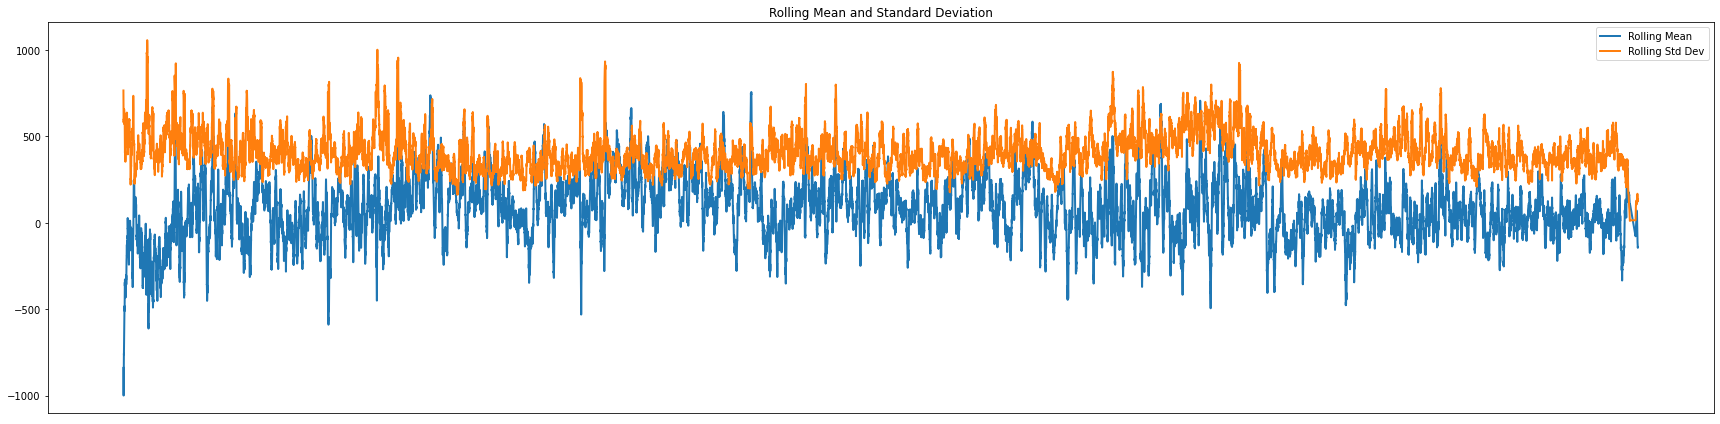

In [37]:
# Plot the statistics
plt.figure(figsize=(24,6))
plt.plot(rolling_mean, label='Rolling Mean',linewidth=2.0)
plt.plot(rolling_std, label = 'Rolling Std Dev',linewidth=2.0)
#plt.plot(imb_filled[1],label='De-Trended Time Series')
plt.xticks([])
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.tight_layout()

In [38]:
# save filled dataframe as csv
imb_filled.to_csv("../data/imbalance_1h.csv")